In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#pip install seaborn

In [4]:
#pip install openpyxl

In [36]:
# Read Excel file
data = pd.read_excel('data.xlsx')
#create a new column of GPA
data['GPA']=data['CGPA']/10*4
data

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills,GPA
0,Shraddha,shraddha@xyz.com,1,Art of Resume Building,NAN,"Vidyalankar Institute of Technology, Mumbai",Email,NaN,Students,2025,Orchha,7.9,7,0-2 Lakh,24,no,3.16
1,Pratiksha,pratiksha@xyz.com,1,Art of Resume Building,NAN,ADHIYAMAAN COLLEGE OF ENGINEERING,Whatsapp,NaN,Students,2026,Ujjain,7.7,7,0-2 Lakh,21,no,3.08
2,Vaishnavi,vaishnavi@xyz.com,1,Art of Resume Building,NAN,DKTE Society's Textile And Engineering Institu...,Email,NaN,Students,2025,Agartala,7.1,3,0-2 Lakh,20,yes,2.84
3,Vishal,vishal@xyz.com,1,Art of Resume Building,NAN,St.Francis Institute of Technology,Youtube | Facebook,NaN,Students,2023,Palashi,7.3,4,0-2 Lakh,21,no,2.92
4,Bhushan,bhushan@xyz.com,1,Data Visualization using Power BI,NAN,"priyadarshini college of engineering, nagpur",NaN,NaN,Students,2024,Bhandara,6.7,3,0-2 Lakh,9,no,2.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,Patel Niraj,patelniraj@xyz.com,1,The SDLC & their transformations,Attending,"thakur institute of management studies, career...",LinkedIn | Whatsapp | Email,NaN,Students,2024,Jodhpur,6.9,6,0-2 Lakh,15,yes,2.76
4890,VIDIT,vidit@xyz.com,1,Data Visualization using Power BI,Attending,government polytechnic gandhinagar,NaN,NaN,Students,2023,Jalgaon,6.5,6,0-2 Lakh,8,no,2.60
4891,Suryaprakash,suryaprakash@xyz.com,1,Data Visualization using Power BI,Attending,"vishwakarma institute of technology, pune",NaN,NaN,Students,2024,Thane,6.9,5,0-2 Lakh,7,no,2.76
4892,Saif ali,saifali@xyz.com,1,Data Visualization using Power BI,Attending,"mit academy of engineering ,alandi",NaN,NaN,Students,2024,Patiala,9.0,3,0-2 Lakh,23,yes,3.60


In [6]:
#Q1) How many unique students are included in the dataset?
#Get students from the given designation
rslt_df = data[data['Designation'] =='Students']
# Define the combination of columns that represent a unique student
unique_columns = ['First Name', 'Email ID', 'College Name']

# Find unique students based on the defined combination of columns
unique_students = rslt_df.drop_duplicates(subset=unique_columns)

# Get the number of unique students
num_unique_students = len(unique_students)

# Print the number of unique students
print("Number of unique students:", num_unique_students)


Number of unique students: 4271


In [37]:
#Q2) What is the average GPA of the students
#rslt_df contains the data where designation='Student'
rslt_df = data[data['Designation'] =='Students']
print("AVERAGE GPA=",rslt_df['GPA'].mean())

AVERAGE GPA= 3.215299295774648


In [39]:
#Q3) What is the distribution of the students across different graduation years
#rslt_df contains the data where designation='Student'
df=rslt_df["Year of Graduation"].value_counts().reset_index()
print('Distribution of students among different graduation years are: \n',df)

Distribution of students among different graduation years are: 
    Year of Graduation  count
0                2023   1421
1                2024   1402
2                2025   1201
3                2026    520


In [40]:
#Q4) What is the distribution of students experience with Python programming
#rslt_df contains the data where designation='Student'
exp = rslt_df["Experience with python (Months)"].value_counts().reset_index()
print('he distribution of students experience with Python programming are: \n',exp)

he distribution of students experience with Python programming are: 
    Experience with python (Months)  count
0                                5   1161
1                                3    934
2                                8    772
3                                6    695
4                                7    573
5                                4    409


In [10]:
rslt_df['Family Income'].unique()

array(['0-2 Lakh', '7 Lakh+', '5-7 Lakh', '2-5 Lakh'], dtype=object)

In [11]:
#Q5) What is the average family income of the students
#rslt_df contains the data where designation='Student'
#to find the average family income we need to replace 0-2 Lakhs with the average salary..
replacements = {'7 Lakh+':'700000','0-2 Lakh':'100000','5-7 Lakh': '600000', '2-5 Lakh': '350000'}
rslt_df['Family Income']= rslt_df['Family Income'].replace(replacements)
print("average family income of the students:",rslt_df['Family Income'].astype(int).mean())


average family income of the students: 127541.81338028169


C:\Users\HP\AppData\Local\Temp\ipykernel_3304\4090476327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['Family Income']= rslt_df['Family Income'].replace(replacements)


In [42]:
#Q6)How does GPA vary among different colleges(Show top 5 results)
len(data['College Name'].unique())
cllg=data.groupby("College Name").agg(
    { "GPA": pd.Series.mean})
#get the top 5 colleges 
cllg.head(5)

,GPA
College Name,
A. C. Patil College of Engineering,3.109189
ADHIYAMAAN COLLEGE OF ENGINEERING,3.058182
AP SHAH INSTITUTE OF TECHNOLOGY,3.313333
"B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan",3.382564
CHHATTISGARH SWAMI VIVEKANANDA TECHNICAL UNIVERSITY TEACHING DEPARTMENT BHILAI,3.181818


In [13]:
#Q7) Are there any outliers between attending status and quantity(number of courses completed) attribute?
# data['Attendee Status'].unique()
data[['Quantity','Attendee Status']]
print("there is no outlier between Atteendee status and quantity")

there is no outlier between Atteendee status and quantity


In [35]:
#Q8 What is the average GPA for student from each city
#rslt_df contains the data where designation='Student'
cities=rslt_df.groupby("City").agg(
    { "CGPA": pd.Series.mean})
print('The average GPA of students from each city=',cities)

The average GPA of students from each city=                CGPA
City               
Agartala   7.687500
Agra       8.000000
Ahemdabad  8.212245
Ajmer      8.271429
Akola      8.013514
...             ...
Vidisha    7.735897
Vijaywada  7.995000
Wardha     8.328571
konark     7.984615
kullu      7.933333

[177 rows x 1 columns]


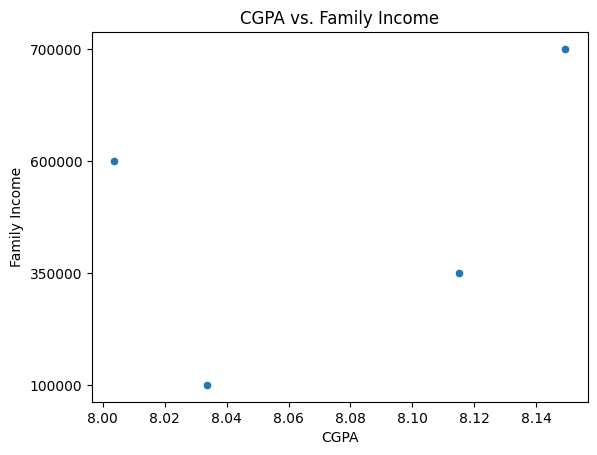

From the above graph it seems that there is a potential linear relationship between Family Income and CGPA. 


In [15]:
#Q9) Can we identify any relationship between family income and GPA?
#to find the relationship between cgpa and family income we need to get the exact salary amount to get that replace 0-2 Lakhs with the average salary..
replacements = {'7 Lakh+':'700000','0-2 Lakh':'100000','5-7 Lakh': '600000', '2-5 Lakh': '350000'}
data['Family Income']= data['Family Income'].replace(replacements)
income=data.groupby("Family Income").agg(
    { "CGPA": pd.Series.mean})
a=income.sort_values(by='Family Income',ascending=False)

#plot graph using the above data
sns.scatterplot(x='CGPA', y='Family Income', data=a)
plt.xlabel('CGPA')
plt.ylabel('Family Income')
plt.title('CGPA vs. Family Income')

plt.show()
print("From the above graph it seems that there is a potential linear relationship between Family Income and CGPA. ")

In [16]:
#Q10) How does the expected salary vary based on factors like 'GPA','Family Income','Experience with python(Months)' 
vary=data.groupby(['CGPA','Family Income','Experience with python (Months)']).agg({ "Expected salary (Lac)": pd.Series.mean})
a=vary.sort_values(by='Expected salary (Lac)',ascending=False)
print("In the below dataframe it seems that people with  experience of 6-8 months in python and family income of 5-7L and 9+ GPA expects mmore salary comparatively",a)

In the below dataframe it seems that people with  experience of 6-8 months in python and family income of 5-7L and 9+ GPA expects mmore salary comparatively                                                     Expected salary (Lac)
CGPA Family Income Experience with python (Months)                       
9.3  600000        6                                                 35.0
9.2  350000        6                                                 30.0
6.2  700000        8                                                 30.0
9.3  700000        8                                                 30.0
6.9  600000        7                                                 30.0
...                                                                   ...
6.4  700000        8                                                  5.0
8.2  350000        5                                                  5.0
6.8  600000        5                                                  5.0
8.4  600000        3         

In [34]:
#Q11) Which event tend to attract more students from specific field of study?
#rslt_df contains the data where designation='Student'

event=rslt_df.groupby("Events").agg(
    { "Designation": pd.Series.count})
a=event.sort_values(by='Designation',ascending=False)
print("The below result shows that-Product Design & Full Stack event attracts more students")
a

The below result shows that-Product Design & Full Stack event attracts more students


,Designation
Events,
Product Design & Full Stack,842
Internship Program(IP) Success Conclave,545
Art of Resume Building,478
Data Visualization using Power BI,455
Talk on Skill and Employability Enhancement,379
Skill and Employability Enhancement,318
IS DATA SCIENCE FOR YOU?,303
Hello ML and DL,262
KYC - Know Your CCPC,166


C:\Users\HP\AppData\Local\Temp\ipykernel_3304\3221498376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df['Leadership- skills']= rslt_df['Leadership- skills'].replace(replacements)


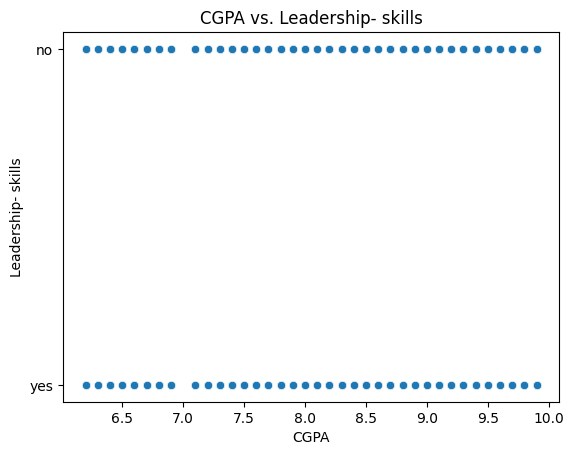

In the above graph it seems that leadership positions do not affect CGPA


In [33]:
#Q12) Do students in leadership positions during there college years tend to have higher GPAs or better expected salary?
#i)
replacements={'no ':'no'}
rslt_df['Leadership- skills']= rslt_df['Leadership- skills'].replace(replacements)
sns.scatterplot(x='CGPA', y='Leadership- skills', data=rslt_df)
plt.xlabel('CGPA')
plt.ylabel('Leadership- skills')
plt.title('CGPA vs. Leadership- skills')

plt.show()

print("In the above graph it seems that leadership positions do not affect CGPA")


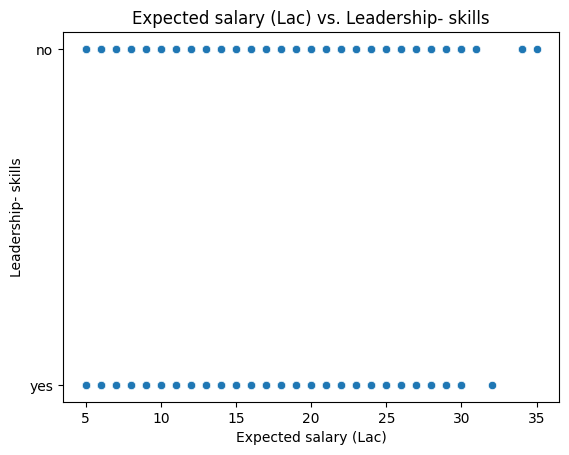

In the above graph it seems that leadership positions do not affect Expected Salary


In [32]:
#Q12) Do students in leadership positions during there college years tend to have higher GPAs or better expected salary?
#ii)
sns.scatterplot(x='Expected salary (Lac)', y='Leadership- skills', data=rslt_df)
plt.xlabel('Expected salary (Lac)')
plt.ylabel('Leadership- skills')
plt.title('Expected salary (Lac) vs. Leadership- skills')

plt.show()

print("In the above graph it seems that leadership positions do not affect Expected Salary")

In [31]:
#Q13) Is there any correlation between Leadership skills and expected salary of the students?
#rslt_df contains the data where designation='Student'
corr=rslt_df[['Expected salary (Lac)','Leadership- skills']] 

#replca 'yes' with '1' and 'no' with '0'
replace = {'yes':'1','no':'0'}
corr['Leadership- skills']= corr['Leadership- skills'].replace(replace)

correlation=corr = corr.corr(method = 'spearman').astype(int)
print('The below performed correlation method shows that that there isn\'t any correlation between Leadership skills and expected salary of the students \n',correlation)

The below performed correlation method shows that that there isn't any correlation between Leadership skills and expected salary of the students 
                        Expected salary (Lac)  Leadership- skills
Expected salary (Lac)                      1                   0
Leadership- skills                         0                   1


C:\Users\HP\AppData\Local\Temp\ipykernel_3304\365052699.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr['Leadership- skills']= corr['Leadership- skills'].replace(replace)


In [21]:
#Q14) How many students are graduating at the end of 2024?
#rslt_df contains the data where designation='Student'
graduate=rslt_df[rslt_df['Year of Graduation'] ==2024]
print('Total number of students graduating in the year 2024 are:-',graduate['Year of Graduation'].count())

Total number of students graduating in the year 2024 are:- 1402


In [29]:
#Q15) Which promotion channel brings in more student participations for the event?

#rslt_df contains the data where designation='Student'
#rslt_df['How did you come to know about this event?'].unique()
values=rslt_df['How did you come to know about this event?'].unique()
print("All the available promotion channels: \n",values)
#remove '|' from the data and get the individual channel names
rslt_df1=rslt_df['How did you come to know about this event?'].str.split('|')
new_rslt_df=rslt_df1.explode('How did you come to know about this event?').reset_index()
#rename the columns
new_rslt_df.columns=['c','How did you come to know about this event?']
# Count the occurrences of each channel
channel_counts = new_rslt_df['How did you come to know about this event?'].value_counts()

# # Get the channel with the highest count
most_successful_channel = channel_counts.idxmax()

print(f"The promotion channel that brings in the most student participations is: {most_successful_channel}")






All the available promotion channels: 
 ['Email' 'Whatsapp' 'Youtube | Facebook' nan 'Others'
 'Instagram | LinkedIn | Cloud Counselage Website' 'LinkedIn'
 'Cloud Counselage Website' 'Instagram | Whatsapp | Email' 'Youtube'
 'Whatsapp | Others' 'Instagram | Whatsapp' 'Youtube | Whatsapp | Email'
 'Facebook' 'Youtube | Facebook | Instagram | LinkedIn | Whatsapp | Email'
 'Instagram | Email' 'LinkedIn | Email | Cloud Counselage Website'
 'Youtube | Facebook | Instagram | Whatsapp | Email' 'Email | Others'
 'LinkedIn | Whatsapp' 'Email | Cloud Counselage Website'
 'Whatsapp | Email' 'LinkedIn | Email' 'Youtube | Email'
 'Youtube | Facebook | Instagram | LinkedIn | Whatsapp | Email | Cloud Counselage Website'
 'Facebook | Whatsapp' 'Youtube | Whatsapp'
 'Youtube | Facebook | Instagram | LinkedIn | Whatsapp | Email | Cloud Counselage Website | Others'
 'Youtube | Facebook | Whatsapp | Email' 'Facebook | Instagram'
 'Email | SPOC/ College Professor' 'SPOC/ College Professor'
 'Cloud Counsel

In [23]:
#Q16) Find the total number of students who attended the event related to datascience(From all Data science related courses)

print("In the below given dataset we can see there is 5 events related to data science i.e. : \nData Visualization using Power BI ,\n Artificial Intelligence,\n Hello ML and DL,\n IS DATA SCIENCE FOR YOU?,\n RPA: A Boon or A Bane \n\n",rslt_df['Events'].unique())
# ds=rslt_df[(rslt_df['Events'] =='Data Visualization using Power BI') and (rslt_df['Events'] =='Artificial Intelligence')]

ds = rslt_df[(rslt_df['Events'] == 'Data Visualization using Power BI') | (rslt_df['Events'] == 'Artificial Intelligence') | (rslt_df['Events'] == 'Hello ML and DL')| (rslt_df['Events'] == ' IS DATA SCIENCE FOR YOU?' ) | (rslt_df['Events'] == 'RPA: A Boon or A Bane ' )]

print('\n The total number of students who attended the event related to datascience are:- \n',ds['Events'].count())

In the below given dataset we can see there is only one event related to data science i.e. : 
Data Visualization using Power BI ,
 Artificial Intelligence,
 Hello ML and DL,
 IS DATA SCIENCE FOR YOU?,
 RPA: A Boon or A Bane 

 ['Art of Resume Building' 'Data Visualization using Power BI'
 'Product Design & Full Stack' 'Artificial Intelligence' 'Hello ML and DL'
 'Product Marketing' 'IAC - Q&A' 'Internship Program(IP) Success Conclave'
 'IS DATA SCIENCE FOR YOU?' 'KYC - Know Your CCPC' 'RPA: A Boon or A Bane'
 'Skill and Employability Enhancement'
 'Talk on Skill and Employability Enhancement' 'The Agile Ways of Working'
 'The SDLC & their transformations'
 'Transformation with DevOps: The Easy Way']

 The total number of students who attended the event related to datascience are:- 
 842


The average CGPA is 8.038475684511647 The average of Experience with python (Months) is 5.395586432366163


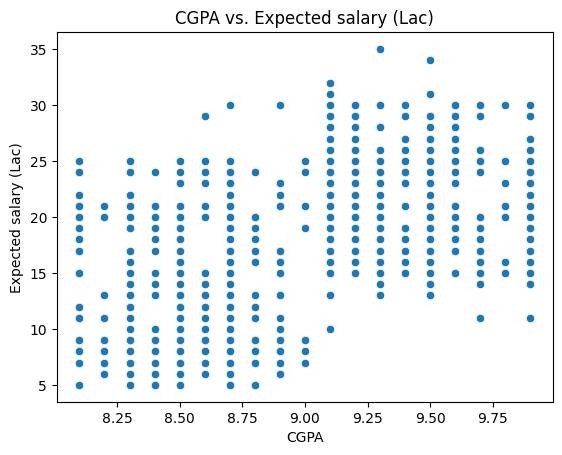

In the above graph it seems that those with high CGPA have high salary expectations 


In [24]:
#Q17) Those who have high CGPA & More experience in language those who had high expectations for salary(Avg)
print("The average CGPA is",data["CGPA"].mean(),"The average of Experience with python (Months) is",data["Experience with python (Months)"].mean())



# Define the threshold values for salary and CGPA
high_exp_in_py = data["Experience with python (Months)"].mean()  
high_cgpa_threshold = data["CGPA"].mean()

df = pd.DataFrame(data)
# Filter individuals with high salary and high CGPA
high_values = df[(df['Experience with python (Months)'] >= high_exp_in_py ) &
    (df['CGPA'] >= high_cgpa_threshold)
]

sns.scatterplot(x='CGPA', y='Expected salary (Lac)', data=high_values)
plt.xlabel('CGPA')
plt.ylabel('Expected salary (Lac)')
plt.title('CGPA vs. Expected salary (Lac)')

plt.show()
print("In the above graph it seems that those with high CGPA have high salary expectations ")

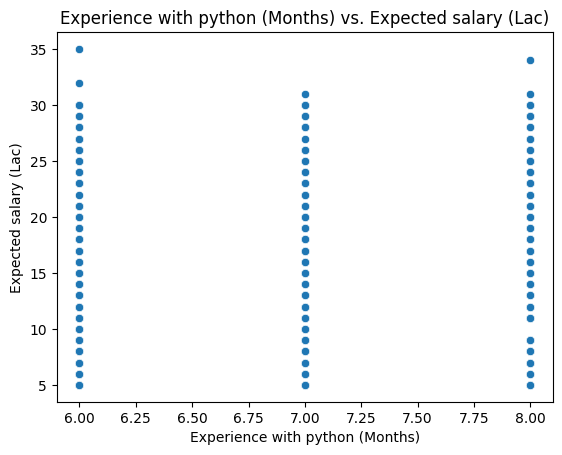

In the above graph it seems that those with high Experience with python (Months) have high salary expectations 


In [25]:
#Q17) Those who have high CGPA & More experience in language those who had high expectations for salary(Avg)
sns.scatterplot(x='Experience with python (Months)', y='Expected salary (Lac)', data=high_values)
plt.xlabel('Experience with python (Months)')
plt.ylabel('Expected salary (Lac)')
plt.title('Experience with python (Months) vs. Expected salary (Lac)')

plt.show()
print("In the above graph it seems that those with high Experience with python (Months) have high salary expectations ")

In [26]:
#Q18) How many students know about these events from there colleges? Which of these top 5 colleges?
top5=rslt_df[rslt_df['How did you come to know about this event?'].str.contains('College Professor', case=False, na=False)]

# Group by 'College Name' and count occurrences
top = top5['College Name'].value_counts().reset_index()

# Rename the columns
top.columns = ['College Name', 'Count']

# Sort by count in descending order
top = top.sort_values(by='Count', ascending=False)

# Get the top 5 colleges

print("total number of students know about these events from there colleges are:",len(top5),"\n out of these top 5 colleges are:\n",top.head(5))




     First Name         Email ID  Quantity   
356        Amey     amey@xyz.com         1  \
357       Kiran    kiran@xyz.com         1   
362     Shubham  shubham@xyz.com         1   
365      Akshay   akshay@xyz.com         1   
368         Abu      abu@xyz.com         1   
...         ...              ...       ...   
4567      Monte    monte@xyz.com         1   
4571       Wade     wade@xyz.com         1   
4579      Mazie    mazie@xyz.com         1   
4583     Bonita   bonita@xyz.com         1   
4682    Gaikwad  gaikwad@xyz.com         1   

                                   Events Attendee Status   
356     Data Visualization using Power BI       Attending  \
357     Data Visualization using Power BI       Attending   
362     Data Visualization using Power BI       Attending   
365     Data Visualization using Power BI       Attending   
368     Data Visualization using Power BI       Attending   
...                                   ...             ...   
4567          Produc